In [1]:
import uproot as ur
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np
import awkward as ak
import mplhep as hep
hep.style.use("CMS")

In [2]:
step = 1
include_vinny = False
data_name = "H1"

In [3]:
data_directory = "/global/homes/r/rmilton/m3246/rmilton/H1Unfold/jet_data/"
file_name = f"Rapgap_lab_kt_{data_name}unfolding.root"
if step == 1:
    event_name = "reco_event"
    jet_name = "reco_jets"
    unfolded_weight_name = "step1_weights"
elif step == 2:
    event_name = "gen_event"
    jet_name = "gen_jets"
    unfolded_weight_name = "step2_weights"
with ur.open(f"{data_directory+file_name}:{event_name}") as event:
    event_info = event.arrays(["Q2", "y","elec_phi", "elec_eta", "elec_pT", "weight", f"{unfolded_weight_name}"])
    print("Number of events:",event.num_entries)
with ur.open(f"{data_directory+file_name}:{jet_name}") as out:
    MC_jets = out.arrays(["eta", "px", "py", "pz", "E", "pT", "phi"])
event_info["unfolded_weights"] = event_info[f"{unfolded_weight_name}"]

Number of events: 778797


In [4]:
if include_vinny:
    data_directory = "/global/homes/r/rmilton/m3246/rmilton/H1Unfold/jet_data/"
    file_name = "Rapgap_lab_kt_Djangohunfolding_vinny.root"
    if step == 1:
        event_name = "reco_event"
        jet_name = "reco_jets"
        unfolded_weight_name = "step1_weights"
    elif step == 2:
        event_name = "gen_event"
        jet_name = "gen_jets"
        unfolded_weight_name = "step2_weights"
    with ur.open(f"{data_directory+file_name}:{event_name}") as event:
        vinny_event_info = event.arrays(["Q2", "y","elec_phi", "elec_eta", "elec_pT", "weight", f"{unfolded_weight_name}"])
        print("Number of events:",event.num_entries)
    with ur.open(f"{data_directory+file_name}:{jet_name}") as out:
        vinny_MC_jets = out.arrays(["eta", "px", "py", "pz", "E", "pT", "phi"])
    vinny_event_info["unfolded_weights"] = vinny_event_info[f"{unfolded_weight_name}"]

In [5]:
data_directory = "/global/homes/r/rmilton/m3246/rmilton/H1Unfold/jet_data/"
file_name = f"{data_name}_lab_kt.root"
if step == 1:
    event_name = "reco_event"
    jet_name = "reco_jets"
elif step == 2:
    event_name = "gen_event"
    jet_name = "gen_jets"
with ur.open(f"{data_directory+file_name}:{event_name}") as event:
    data_event_info = event.arrays(["Q2", "y","elec_phi", "elec_eta", "elec_pT", "weight"])
    print("Number of events:",event.num_entries)
with ur.open(f"{data_directory+file_name}:{jet_name}") as out:
    data_jets = out.arrays(["eta", "px", "py", "pz", "E", "pT", "phi"])

Number of events: 213702


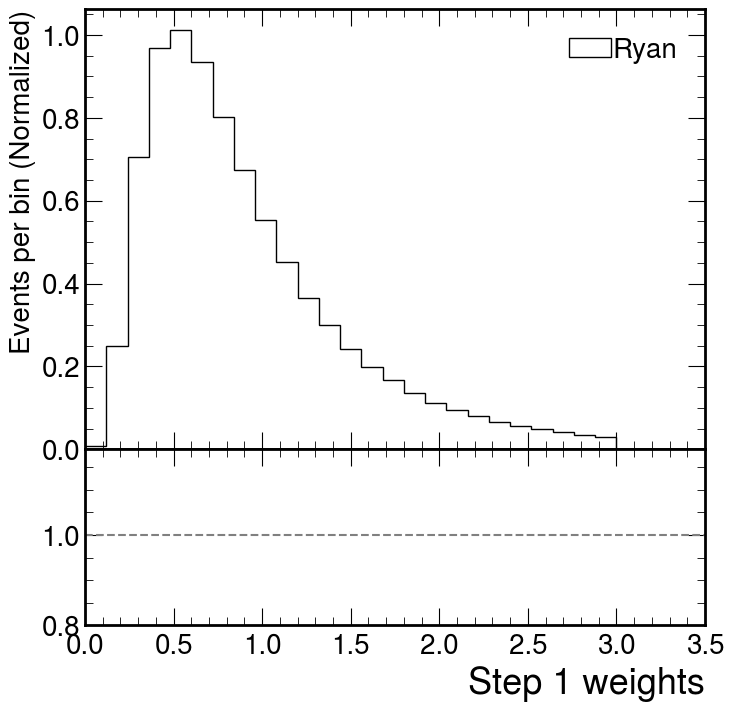

In [6]:
fig = plt.figure(figsize=(8,8))
gs = fig.add_gridspec(2, hspace=0, height_ratios=[2.5, 1])
axs = gs.subplots(sharex=True)

xlow, xhigh = 0, 3
unfolded_entries, unfolded_bins, _ = axs[0].hist(event_info["unfolded_weights"], bins=25, histtype='step', label="Ryan", density=True, color='black', range=(xlow, xhigh))    

bin_centers = unfolded_bins[:-1]+ 0.5*(unfolded_bins[1:] - unfolded_bins[:-1])

axs[0].set_ylabel("Events per bin (Normalized)", fontsize=20)
axs[0].set_xlim(0, 3.5)
axs[0].tick_params(axis='both', which='major', labelsize=20)
axs[0].tick_params(axis='both', which='minor', labelsize=20)

if include_vinny:
    unfolded_entries_vinny, unfolded_bins_vinny, _ = axs[0].hist(vinny_event_info["unfolded_weights"], bins=25, histtype='step', label="Vinny", density=True, color='purple', range=(xlow, xhigh))
    axs[1].scatter(bin_centers, unfolded_entries/unfolded_entries_vinny, color='black')
    axs[1].set_ylabel("Ryan/Vinny", fontsize=20)

axs[0].legend(loc='upper right', handletextpad=0.05, fontsize=20)

axs[1].set_ylim(.8, 1.19)
axs[1].tick_params(axis='both', which='major', labelsize=20)
axs[1].tick_params(axis='both', which='minor', labelsize=20)
axs[1].hlines(1, 0, 3.5, color='grey', linestyle='dashed' )
plt.xlabel(f"Step {step} weights")
plt.savefig(f"../plots/Rapgap_{data_name}_unfolding_step{step}_weights.pdf")

[8.30888764e-01 8.08034434e-01 5.42766728e-01 3.51845822e-01
 2.19428653e-01 1.41308207e-01 9.46093121e-02 5.86314495e-02
 3.44865278e-02 1.89821654e-02 1.19707699e-02 7.00901191e-03
 3.31475609e-03 1.26402172e-03 4.59363937e-04]


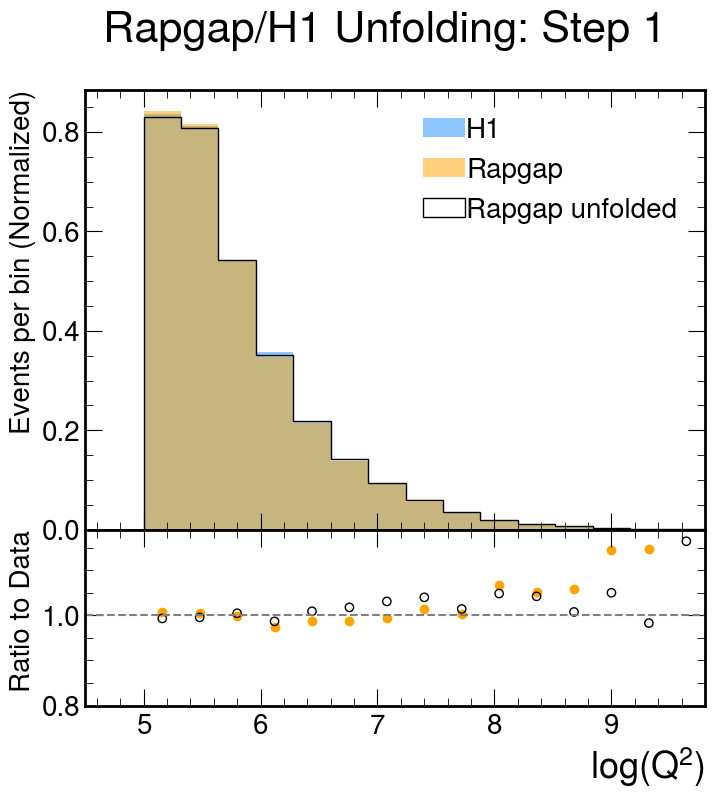

In [7]:
fig = plt.figure(figsize=(8,8))
gs = fig.add_gridspec(2, hspace=0, height_ratios=[2.5, 1])
axs = gs.subplots(sharex=True)

xlow, xhigh = 5, 9.8
data_entries, data_bins, _ = axs[0].hist(np.log(data_event_info["Q2"]), weights=data_event_info["weight"], bins=15, histtype='stepfilled', label=data_name, density=True, alpha=.5, color='dodgerblue', range=(xlow, xhigh))
MC_entries, MC_bins, _ = axs[0].hist(np.log(event_info["Q2"]), weights=event_info["weight"], bins=15, histtype='stepfilled', label="Rapgap", density=True, alpha=.5, color='orange', range=(xlow, xhigh))
unfolded_entries, unfolded_bins, _ = axs[0].hist(np.log(event_info["Q2"]), weights=event_info["weight"]*event_info["unfolded_weights"], bins=15, histtype='step', label="Rapgap unfolded", density=True, color='black', range=(xlow, xhigh))

print(unfolded_entries)
data_bin_centers = data_bins[:-1]+ 0.5*(data_bins[1:] - data_bins[:-1])

axs[0].set_ylabel("Events per bin (Normalized)", fontsize=20)
axs[0].set_xlim(4.5, xhigh)
axs[0].tick_params(axis='both', which='major', labelsize=20)
axs[0].tick_params(axis='both', which='minor', labelsize=20)

axs[1].scatter(data_bin_centers, MC_entries/data_entries, color='orange')
axs[1].scatter(data_bin_centers, unfolded_entries/data_entries, color='black', facecolors='none')

if include_vinny:
    unfolded_entries_vinny, unfolded_bins_vinny, _ = axs[0].hist(np.log(vinny_event_info["Q2"]), weights=vinny_event_info["weight"]*vinny_event_info["unfolded_weights"], bins=15, histtype='step', label="Rapgap unfolded (Vinny)", density=True, color='purple', range=(xlow, xhigh))
    axs[1].scatter(data_bin_centers, unfolded_entries_vinny/data_entries, color='purple', facecolors='none',  marker='s')
axs[0].legend(loc='upper right', handletextpad=0.05, fontsize=20)
 
axs[1].set_ylabel("Ratio to Data", fontsize=20)
axs[1].set_ylim(.8, 1.19)
axs[1].tick_params(axis='both', which='major', labelsize=20)
axs[1].tick_params(axis='both', which='minor', labelsize=20)
axs[1].hlines(1, 4.5, xhigh, color='grey', linestyle='dashed' )
plt.xlabel("log($Q^2$)")
plt.suptitle(f"Rapgap/{data_name} Unfolding: Step {step}")
plt.savefig(f"../plots/Rapgap_{data_name}_unfolding_step{step}_logQ2.pdf")

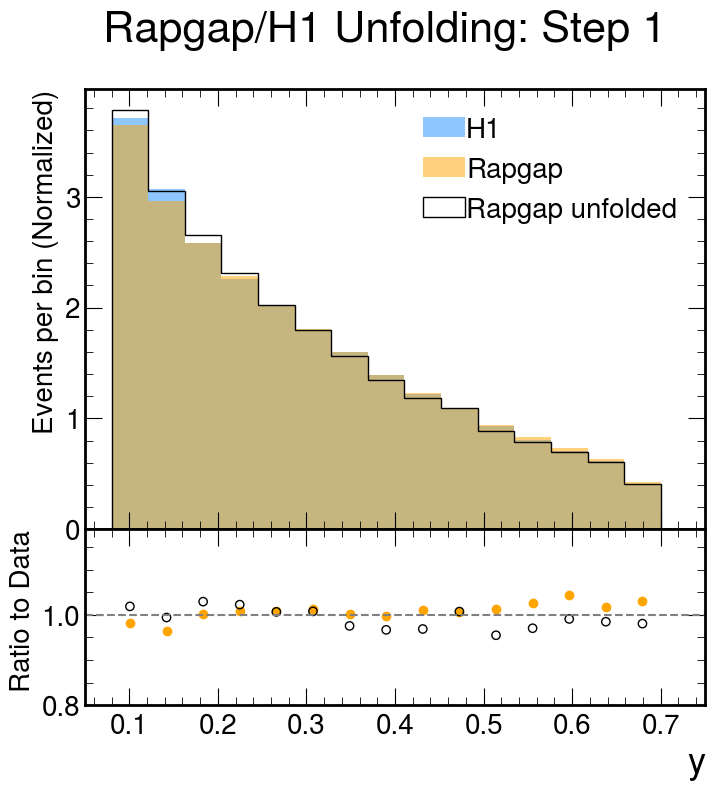

In [8]:
fig = plt.figure(figsize=(8,8))
gs = fig.add_gridspec(2, hspace=0, height_ratios=[2.5, 1])
axs = gs.subplots(sharex=True)

xlow, xhigh = .08, .7
data_entries, data_bins, _ = axs[0].hist(data_event_info["y"], weights=data_event_info["weight"], bins=15, histtype='stepfilled', label=data_name, density=True, alpha=.5, color='dodgerblue', range=(xlow, xhigh))
MC_entries, MC_bins, _ = axs[0].hist(event_info["y"], weights=event_info["weight"], bins=15, histtype='stepfilled', label="Rapgap", density=True, alpha=.5, color='orange', range=(xlow, xhigh))
unfolded_entries, unfolded_bins, _ = axs[0].hist(event_info["y"], weights=event_info["weight"]*event_info["unfolded_weights"], bins=15, histtype='step', label="Rapgap unfolded", density=True, color='black', range=(xlow, xhigh))

data_bin_centers = data_bins[:-1]+ 0.5*(data_bins[1:] - data_bins[:-1])

axs[0].set_ylabel("Events per bin (Normalized)", fontsize=20)
axs[0].set_xlim(.05, .75)
axs[0].tick_params(axis='both', which='major', labelsize=20)
axs[0].tick_params(axis='both', which='minor', labelsize=20)


axs[1].scatter(data_bin_centers, MC_entries/data_entries, color='orange')
axs[1].scatter(data_bin_centers, unfolded_entries/data_entries, color='black', facecolors='none')

if include_vinny:
    unfolded_entries_vinny, unfolded_bins_vinny, _ = axs[0].hist(vinny_event_info["y"], weights=vinny_event_info["weight"]*vinny_event_info["unfolded_weights"], bins=15, histtype='step', label="Rapgap unfolded (Vinny)", density=True, color='purple', range=(xlow, xhigh))
    axs[1].scatter(data_bin_centers, unfolded_entries_vinny/data_entries, color='purple', facecolors='none', marker='s')

axs[0].legend(loc='upper right', handletextpad=0.05, fontsize=20)

axs[1].set_ylabel("Ratio to Data", fontsize=20)
axs[1].set_ylim(.8, 1.19)
axs[1].tick_params(axis='both', which='major', labelsize=20)
axs[1].tick_params(axis='both', which='minor', labelsize=20)
axs[1].hlines(1, .05, .75, color='grey', linestyle='dashed' )
plt.xlabel("y")
plt.suptitle(f"Rapgap/{data_name} Unfolding: Step {step}")
plt.savefig(f"../plots/Rapgap_{data_name}_unfolding_step{step}_y.pdf")

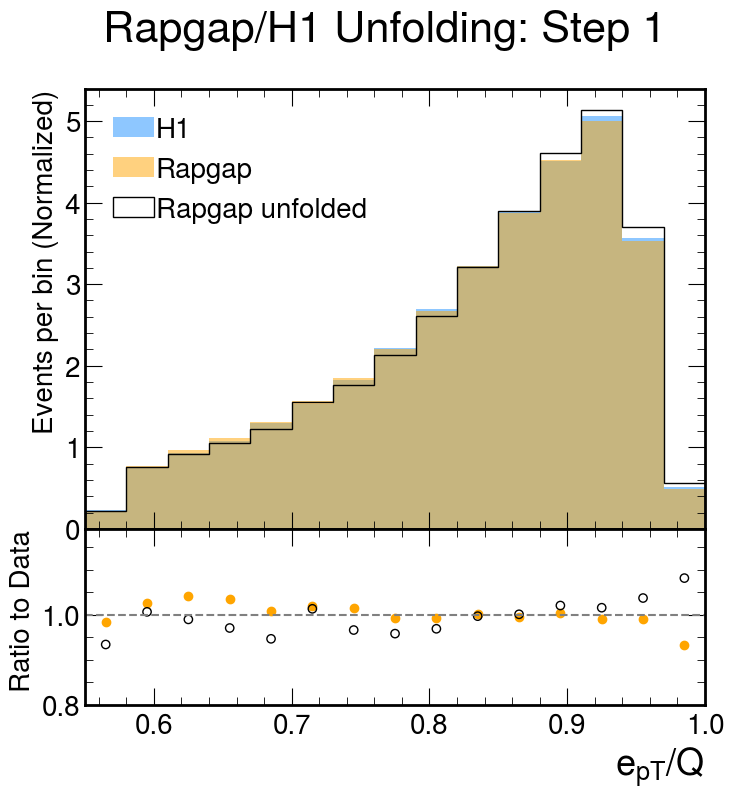

In [9]:
fig = plt.figure(figsize=(8,8))
gs = fig.add_gridspec(2, hspace=0, height_ratios=[2.5, 1])
axs = gs.subplots(sharex=True)

xlow, xhigh = .55, 1
data_entries, data_bins, _ = axs[0].hist(data_event_info["elec_pT"]/np.sqrt(data_event_info["Q2"]), weights=data_event_info["weight"], bins=15, histtype='stepfilled', label=data_name, density=True, alpha=.5, color='dodgerblue', range=(xlow, xhigh))
MC_entries, MC_bins, _ = axs[0].hist(event_info["elec_pT"]/np.sqrt(event_info["Q2"]), weights=event_info["weight"], bins=15, histtype='stepfilled', label="Rapgap", density=True, alpha=.5, color='orange', range=(xlow, xhigh))
unfolded_entries, unfolded_bins, _ = axs[0].hist(event_info["elec_pT"]/np.sqrt(event_info["Q2"]), weights=event_info["weight"]*event_info["unfolded_weights"], bins=15, histtype='step', label="Rapgap unfolded", density=True, color='black', range=(xlow, xhigh))

data_bin_centers = data_bins[:-1]+ 0.5*(data_bins[1:] - data_bins[:-1])

axs[0].set_ylabel("Events per bin (Normalized)", fontsize=20)
axs[0].set_xlim(xlow, xhigh)
axs[0].tick_params(axis='both', which='major', labelsize=20)
axs[0].tick_params(axis='both', which='minor', labelsize=20)


axs[1].scatter(data_bin_centers, MC_entries/data_entries, color='orange')
axs[1].scatter(data_bin_centers, unfolded_entries/data_entries, color='black', facecolors='none')

if include_vinny:
    unfolded_entries_vinny, unfolded_bins_vinny, _ = axs[0].hist(vinny_event_info["elec_pT"]/np.sqrt(vinny_event_info["Q2"]), weights=vinny_event_info["weight"]*vinny_event_info["unfolded_weights"], bins=15, histtype='step', label="Rapgap unfolded (Vinny)", density=True, color='purple', range=(xlow, xhigh))
    axs[1].scatter(data_bin_centers, unfolded_entries_vinny/data_entries, color='purple', facecolors='none', marker='s')

axs[0].legend(loc='upper left', handletextpad=0.05, fontsize=20)
    
axs[1].set_ylabel("Ratio to Data", fontsize=20)
axs[1].set_ylim(.8, 1.19)
axs[1].tick_params(axis='both', which='major', labelsize=20)
axs[1].tick_params(axis='both', which='minor', labelsize=20)
axs[1].hlines(1, xlow, xhigh, color='grey', linestyle='dashed' )
plt.xlabel("$e_{pT}/Q$")
plt.suptitle(f"Rapgap/{data_name} Unfolding: Step {step}")
plt.savefig(f"../plots/Rapgap_{data_name}_unfolding_step{step}_epTQ.pdf")

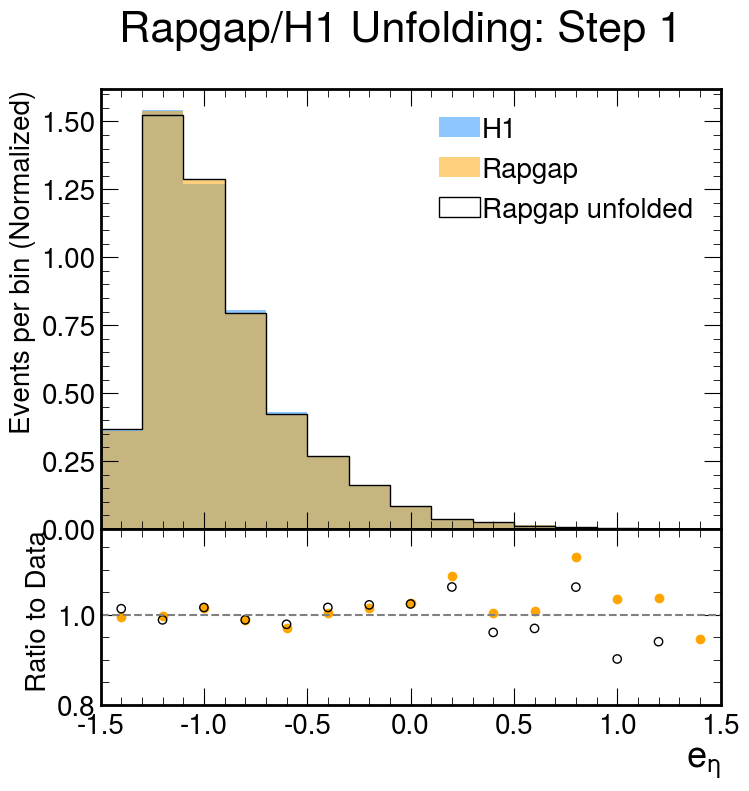

In [10]:
fig = plt.figure(figsize=(8,8))
gs = fig.add_gridspec(2, hspace=0, height_ratios=[2.5, 1])
axs = gs.subplots(sharex=True)

xlow, xhigh = -1.5, 1.5
data_entries, data_bins, _ = axs[0].hist(data_event_info["elec_eta"], weights=data_event_info["weight"], bins=15, histtype='stepfilled', label=data_name, density=True, alpha=.5, color='dodgerblue', range=(xlow, xhigh))
MC_entries, MC_bins, _ = axs[0].hist(event_info["elec_eta"], weights=event_info["weight"], bins=15, histtype='stepfilled', label="Rapgap", density=True, alpha=.5, color='orange', range=(xlow, xhigh))
unfolded_entries, unfolded_bins, _ = axs[0].hist(event_info["elec_eta"], weights=event_info["weight"]*event_info["unfolded_weights"], bins=15, histtype='step', label="Rapgap unfolded", density=True, color='black', range=(xlow, xhigh))

data_bin_centers = data_bins[:-1]+ 0.5*(data_bins[1:] - data_bins[:-1])

axs[0].set_ylabel("Events per bin (Normalized)", fontsize=20)
axs[0].set_xlim(xlow, xhigh)
axs[0].tick_params(axis='both', which='major', labelsize=20)
axs[0].tick_params(axis='both', which='minor', labelsize=20)


axs[1].scatter(data_bin_centers, MC_entries/data_entries, color='orange')
axs[1].scatter(data_bin_centers, unfolded_entries/data_entries, color='black', facecolors='none')
if include_vinny:
    unfolded_entries_vinny, unfolded_bins_vinny, _ = axs[0].hist(vinny_event_info["elec_eta"], weights=vinny_event_info["weight"]*vinny_event_info["unfolded_weights"], bins=15, histtype='step', label="Rapgap unfolded (Vinny)", density=True, color='purple', range=(xlow, xhigh))
    axs[1].scatter(data_bin_centers, unfolded_entries_vinny/data_entries, color='purple', facecolors='none', marker='s')
    
axs[0].legend(loc='upper right', handletextpad=0.05, fontsize=20)

axs[1].set_ylabel("Ratio to Data", fontsize=20)
axs[1].set_ylim(.8, 1.19)
axs[1].tick_params(axis='both', which='major', labelsize=20)
axs[1].tick_params(axis='both', which='minor', labelsize=20)
axs[1].hlines(1, xlow, xhigh, color='grey', linestyle='dashed' )
plt.xlabel("$e_{\eta}$")
plt.suptitle(f"Rapgap/{data_name} Unfolding: Step {step}")
plt.savefig(f"../plots/Rapgap_{data_name}_unfolding_step{step}_eeta.pdf")

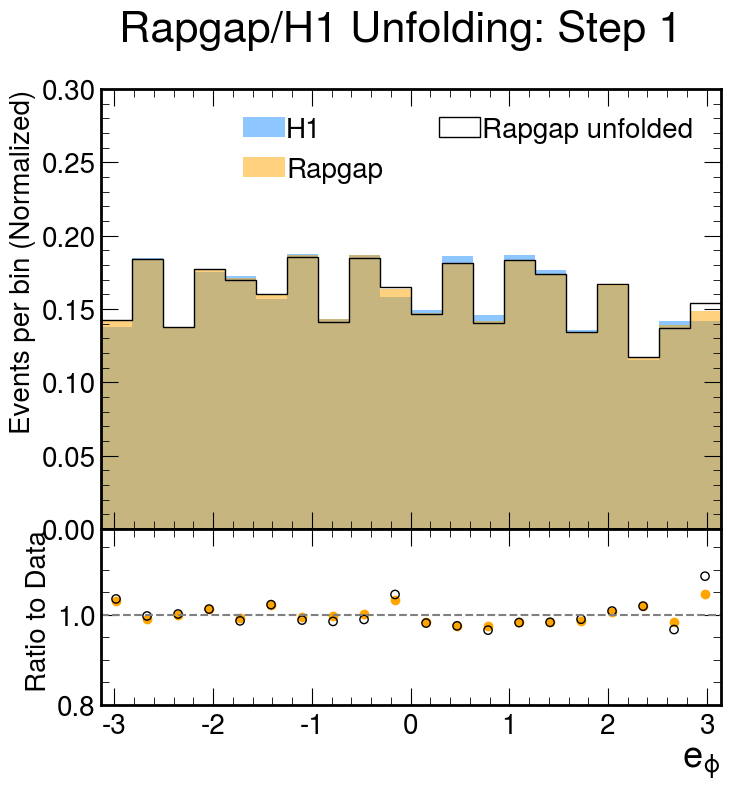

In [11]:
fig = plt.figure(figsize=(8,8))
gs = fig.add_gridspec(2, hspace=0, height_ratios=[2.5, 1])
axs = gs.subplots(sharex=True)

xlow, xhigh = -3.14, 3.14
data_entries, data_bins, _ = axs[0].hist(data_event_info["elec_phi"], weights=data_event_info["weight"], bins=20, histtype='stepfilled', label=data_name, density=True, alpha=.5, color='dodgerblue', range=(xlow, xhigh))
MC_entries, MC_bins, _ = axs[0].hist(event_info["elec_phi"], weights=event_info["weight"], bins=20, histtype='stepfilled', label="Rapgap", density=True, alpha=.5, color='orange', range=(xlow, xhigh))
unfolded_entries, unfolded_bins, _ = axs[0].hist(event_info["elec_phi"], weights=event_info["weight"]*event_info["unfolded_weights"], bins=20, histtype='step', label="Rapgap unfolded", density=True, color='black', range=(xlow, xhigh))

data_bin_centers = data_bins[:-1]+ 0.5*(data_bins[1:] - data_bins[:-1])

axs[0].set_ylabel("Events per bin (Normalized)", fontsize=20)
axs[0].set_xlim(xlow, xhigh)
axs[0].tick_params(axis='both', which='major', labelsize=20)
axs[0].tick_params(axis='both', which='minor', labelsize=20)
axs[0].set_ylim(0, .3)

axs[1].scatter(data_bin_centers, MC_entries/data_entries, color='orange')
axs[1].scatter(data_bin_centers, unfolded_entries/data_entries, color='black', facecolors='none')
if include_vinny:
    unfolded_entries_vinny, unfolded_bins_vinny, _ = axs[0].hist(vinny_event_info["elec_phi"], weights=vinny_event_info["weight"]*vinny_event_info["unfolded_weights"], bins=20, histtype='step', label="Rapgap unfolded (Vinny)", density=True, color='purple', range=(xlow, xhigh))
    axs[1].scatter(data_bin_centers, unfolded_entries_vinny/data_entries, color='purple', facecolors='none', marker='s')
    
axs[0].legend(loc='upper right', handletextpad=0.05, fontsize=20, ncol=2)

axs[1].set_ylabel("Ratio to Data", fontsize=20)
axs[1].set_ylim(.8, 1.19)
axs[1].tick_params(axis='both', which='major', labelsize=20)
axs[1].tick_params(axis='both', which='minor', labelsize=20)
axs[1].hlines(1, xlow, xhigh, color='grey', linestyle='dashed' )
plt.xlabel("$e_{\phi}$")
plt.suptitle(f"Rapgap/{data_name} Unfolding: Step {step}")
plt.savefig(f"../plots/Rapgap_{data_name}_unfolding_step{step}_ephi.pdf")

In [12]:
def remove_zero_jets(events, jets, jetpT_cut=0, event_mask = None, unfolded_weights = True):
    if event_mask is not None:
        events = event_info[event_mask]
        jets = jets[event_mask]
    
    jet_mask = (jets["pT"] > jetpT_cut)
    broadcasted_weights = []

    num_jets_per_event = len(jet_mask[0])

    event_index = np.arange(len(events))
    event_index = np.concatenate([np.repeat(index, num_jets_per_event) for index in event_index])
    event_index = np.array(event_index)[ak.flatten(jet_mask)]
    
    jet_multiplicity = ak.sum(jet_mask, axis=1)
    event_weights = np.concatenate([np.repeat(event_weight, num_jets_per_event) for event_weight in events["weight"]])
    event_weights = np.array(event_weights)[ak.flatten(jet_mask)]

    if unfolded_weights:
        step1_weights = np.concatenate([np.repeat(unfolded_weight, num_jets_per_event) for unfolded_weight in events["unfolded_weights"]])
        step1_weights = np.array(step1_weights)[ak.flatten(jet_mask)]
    
    event_Q2 = np.concatenate([np.repeat(Q2, num_jets_per_event) for Q2 in events["Q2"]])
    event_Q2 = np.array(event_Q2)[ak.flatten(jet_mask)]

    event_y = np.concatenate([np.repeat(y, num_jets_per_event) for y in events["y"]])
    event_y = np.array(event_y)[ak.flatten(jet_mask)]

    event_elec_pT = np.concatenate([np.repeat(pT, num_jets_per_event) for pT in events["elec_pT"]])
    event_elec_pT = np.array(event_elec_pT)[ak.flatten(jet_mask)]

    event_elec_phi = np.concatenate([np.repeat(phi, num_jets_per_event) for phi in events["elec_phi"]])
    event_elec_phi = np.array(event_elec_phi)[ak.flatten(jet_mask)]

    event_elec_eta = np.concatenate([np.repeat(eta, num_jets_per_event) for eta in events["elec_eta"]])
    event_elec_eta = np.array(event_elec_eta)[ak.flatten(jet_mask)]

    if unfolded_weights:
        print(len(event_weights), len(step1_weights), len(event_Q2))
    else:
        print(len(event_weights), len(event_Q2))
    selected_jets = jets[jet_mask]
    flattened_eta = selected_jets["eta"]
    flattened_px = selected_jets["px"]
    flattened_py = selected_jets["py"]
    flattened_pz = selected_jets["pz"]
    flattened_pT = selected_jets["pT"]
    flattened_E = selected_jets["E"]
    flattened_phi = selected_jets["phi"]
    print(len(flattened_phi), len(flattened_eta))
    if unfolded_weights:
        out = {"event_index":event_index,"jet_multiplicity":jet_multiplicity, "jet_eta":flattened_eta, "jet_px":flattened_px, "jet_py":flattened_py, "jet_pz":flattened_pz, "jet_E":flattened_E, "jet_phi":flattened_phi, "jet_pT":flattened_pT, "Q2":event_Q2, "y":event_y, "elec_pT":event_elec_pT, "elec_phi":event_elec_phi, "elec_eta":event_elec_eta, "weight":event_weights, "unfolded_weights":step1_weights}
    else:
        out = {"event_index":event_index,"jet_multiplicity":jet_multiplicity, "jet_eta":flattened_eta, "jet_px":flattened_px, "jet_py":flattened_py, "jet_pz":flattened_pz, "jet_E":flattened_E, "jet_phi":flattened_phi, "jet_pT":flattened_pT, "Q2":event_Q2, "y":event_y, "elec_pT":event_elec_pT, "elec_phi":event_elec_phi, "elec_eta":event_elec_eta, "weight":event_weights}
    return out
filtered_MC = remove_zero_jets(event_info, MC_jets)
filtered_data = remove_zero_jets(data_event_info, data_jets, unfolded_weights = False)
if include_vinny:
    filtered_vinny = remove_zero_jets(vinny_event_info, vinny_MC_jets)
    

3800824 3800824 3800824
3800824 3800824
996387 996387
996387 996387


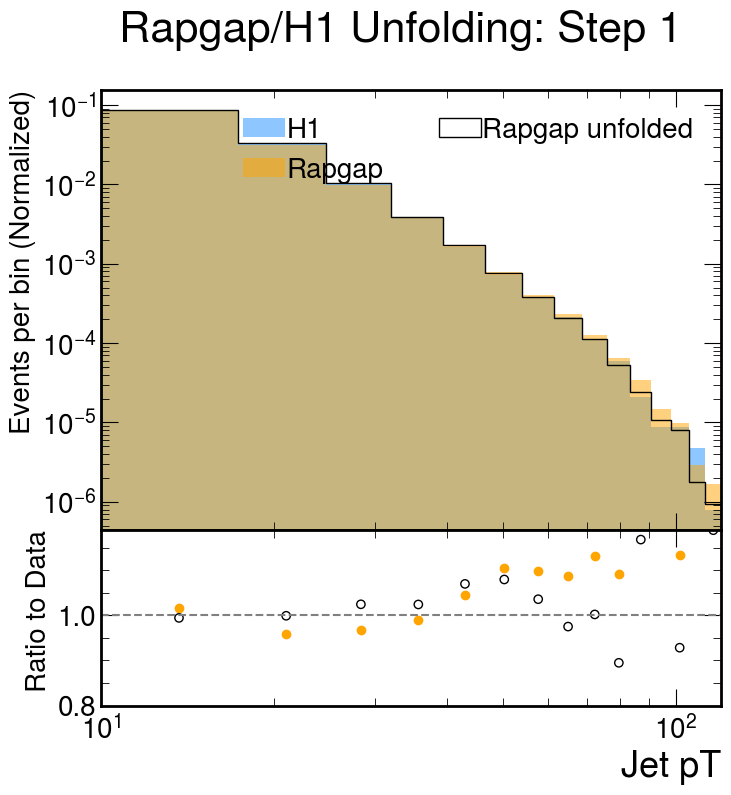

In [13]:
fig = plt.figure(figsize=(8,8))
gs = fig.add_gridspec(2, hspace=0, height_ratios=[2.5, 1])
axs = gs.subplots(sharex=True)

xlow, xhigh = 10, 120
data_entries, data_bins, _ = axs[0].hist(filtered_data["jet_pT"], weights=filtered_data["weight"], bins=15, histtype='stepfilled', label=data_name, density=True, alpha=.5, color='dodgerblue', range=(xlow, xhigh))
MC_entries, MC_bins, _ = axs[0].hist(filtered_MC["jet_pT"], weights=filtered_MC["weight"], bins=15, histtype='stepfilled', label="Rapgap", density=True, alpha=.5, color='orange', range=(xlow, xhigh))
unfolded_entries, unfolded_bins, _ = axs[0].hist(filtered_MC["jet_pT"], weights=filtered_MC["weight"]*filtered_MC["unfolded_weights"], bins=15, histtype='step', label="Rapgap unfolded", density=True, color='black', range=(xlow, xhigh))

data_bin_centers = data_bins[:-1]+ 0.5*(data_bins[1:] - data_bins[:-1])

axs[0].set_ylabel("Events per bin (Normalized)", fontsize=20)
axs[0].set_xlim(xlow, xhigh)
axs[0].tick_params(axis='both', which='major', labelsize=20)
axs[0].tick_params(axis='both', which='minor', labelsize=20)
axs[0].set_yscale('log')
# axs[0].set_ylim(0,1)
axs[1].scatter(data_bin_centers, MC_entries/data_entries, color='orange')
axs[1].scatter(data_bin_centers, unfolded_entries/data_entries, color='black', facecolors='none')
if include_vinny:
    unfolded_entries_vinny, unfolded_bins_vinny, _ = axs[0].hist(filtered_vinny["jet_pT"], weights=filtered_vinny["weight"]*filtered_vinny["unfolded_weights"], bins=15, histtype='step', label="Rapgap unfolded (Vinny)", density=True, color='purple', range=(xlow, xhigh))
    axs[1].scatter(data_bin_centers, unfolded_entries_vinny/data_entries, color='purple', facecolors='none', marker='s')
    
axs[0].legend(loc='upper right', handletextpad=0.05, fontsize=20, ncol=2)

axs[1].set_ylabel("Ratio to Data", fontsize=20)
axs[1].set_ylim(.8, 1.19)
axs[1].tick_params(axis='both', which='major', labelsize=20)
axs[1].tick_params(axis='both', which='minor', labelsize=20)
axs[1].hlines(1, xlow, xhigh, color='grey', linestyle='dashed' )
plt.xlabel("Jet pT")
plt.xscale('log')
plt.suptitle(f"Rapgap/{data_name} Unfolding: Step {step}")
plt.savefig(f"../plots/Rapgap_{data_name}_unfolding_step{step}_jetpT.pdf")

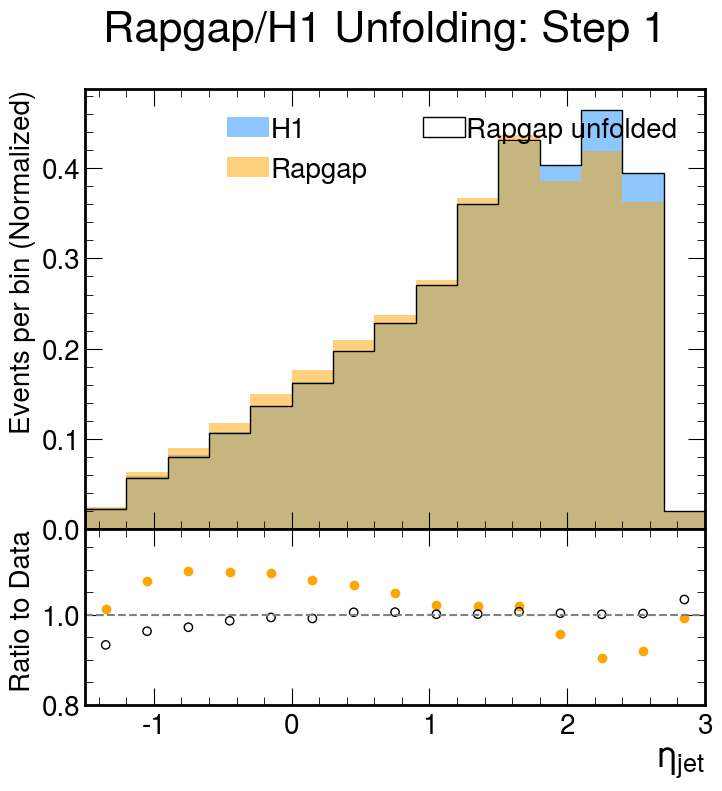

In [14]:
fig = plt.figure(figsize=(8,8))
gs = fig.add_gridspec(2, hspace=0, height_ratios=[2.5, 1])
axs = gs.subplots(sharex=True)

xlow, xhigh = -1.5, 3
data_entries, data_bins, _ = axs[0].hist(filtered_data["jet_eta"], weights=filtered_data["weight"], bins=15, histtype='stepfilled', label=data_name, density=True, alpha=.5, color='dodgerblue', range=(xlow, xhigh))
MC_entries, MC_bins, _ = axs[0].hist(filtered_MC["jet_eta"], weights=filtered_MC["weight"], bins=15, histtype='stepfilled', label="Rapgap", density=True, alpha=.5, color='orange', range=(xlow, xhigh))
unfolded_entries, unfolded_bins, _ = axs[0].hist(filtered_MC["jet_eta"], weights=filtered_MC["weight"]*filtered_MC["unfolded_weights"], bins=15, histtype='step', label="Rapgap unfolded", density=True, color='black', range=(xlow, xhigh))

data_bin_centers = data_bins[:-1]+ 0.5*(data_bins[1:] - data_bins[:-1])

axs[0].set_ylabel("Events per bin (Normalized)", fontsize=20)
axs[0].set_xlim(xlow, xhigh)
axs[0].tick_params(axis='both', which='major', labelsize=20)
axs[0].tick_params(axis='both', which='minor', labelsize=20)
# axs[0].set_yscale('log')
# axs[0].set_ylim(0,1)
axs[1].scatter(data_bin_centers, MC_entries/data_entries, color='orange')
axs[1].scatter(data_bin_centers, unfolded_entries/data_entries, color='black', facecolors='none')

if include_vinny:
    unfolded_entries_vinny, unfolded_bins_vinny, _ = axs[0].hist(filtered_vinny["jet_eta"], weights=filtered_vinny["weight"]*filtered_vinny["unfolded_weights"], bins=15, histtype='step', label="Rapgap unfolded (Vinny)", density=True, color='purple', range=(xlow, xhigh))
    axs[1].scatter(data_bin_centers, unfolded_entries_vinny/data_entries, color='purple', facecolors='none', marker='s')
axs[0].legend(loc='upper right', handletextpad=0.05, fontsize=20, ncol=2)
 
axs[1].set_ylabel("Ratio to Data", fontsize=20)
axs[1].set_ylim(.8, 1.19)
axs[1].tick_params(axis='both', which='major', labelsize=20)
axs[1].tick_params(axis='both', which='minor', labelsize=20)
axs[1].hlines(1, xlow, xhigh, color='grey', linestyle='dashed' )
plt.xlabel("$\eta_{jet}$")
plt.suptitle(f"Rapgap/{data_name} Unfolding: Step {step}")
plt.savefig(f"../plots/Rapgap_{data_name}_unfolding_step{step}_jeteta.pdf")

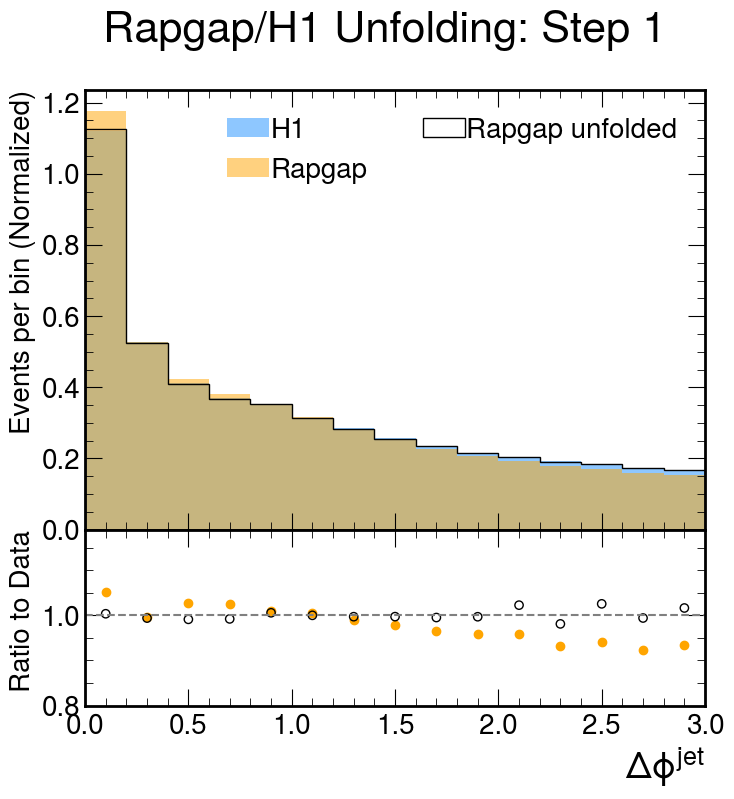

In [15]:
fig = plt.figure(figsize=(8,8))
gs = fig.add_gridspec(2, hspace=0, height_ratios=[2.5, 1])
axs = gs.subplots(sharex=True)

xlow, xhigh = 0, 3
data_delta_phi = np.absolute(np.pi + filtered_data["jet_phi"] - filtered_data["elec_phi"])
data_delta_phi = np.where(data_delta_phi > 2 * np.pi, data_delta_phi - 2 * np.pi, data_delta_phi)

MC_delta_phi = np.absolute(np.pi + filtered_MC["jet_phi"] - filtered_MC["elec_phi"])
MC_delta_phi = np.where(MC_delta_phi > 2 * np.pi, MC_delta_phi - 2 * np.pi, MC_delta_phi)




data_entries, data_bins, _ = axs[0].hist(data_delta_phi, weights=filtered_data["weight"], bins=15, histtype='stepfilled', label=data_name, density=True, alpha=.5, color='dodgerblue', range=(xlow, xhigh))
MC_entries, MC_bins, _ = axs[0].hist(MC_delta_phi, weights=filtered_MC["weight"], bins=15, histtype='stepfilled', label="Rapgap", density=True, alpha=.5, color='orange', range=(xlow, xhigh))
unfolded_entries, unfolded_bins, _ = axs[0].hist(MC_delta_phi, weights=filtered_MC["weight"]*filtered_MC["unfolded_weights"], bins=15, histtype='step', label="Rapgap unfolded", density=True, color='black', range=(xlow, xhigh))

data_bin_centers = data_bins[:-1]+ 0.5*(data_bins[1:] - data_bins[:-1])

axs[0].set_ylabel("Events per bin (Normalized)", fontsize=20)
axs[0].set_xlim(xlow, xhigh)
axs[0].legend(loc='upper right', handletextpad=0.05, fontsize=20, ncol=2)
axs[0].tick_params(axis='both', which='major', labelsize=20)
axs[0].tick_params(axis='both', which='minor', labelsize=20)
# axs[0].set_yscale('log')
# axs[0].set_ylim(0,1)
axs[1].scatter(data_bin_centers, MC_entries/data_entries, color='orange')
axs[1].scatter(data_bin_centers, unfolded_entries/data_entries, color='black', facecolors='none')

if include_vinny:
    vinny_delta_phi = np.absolute(np.pi + filtered_vinny["jet_phi"] - filtered_vinny["elec_phi"])
    vinny_delta_phi = np.where(vinny_delta_phi > 2 * np.pi, vinny_delta_phi - 2 * np.pi, vinny_delta_phi)
    unfolded_entries_vinny, unfolded_bins_vinny, _ = axs[0].hist(vinny_delta_phi, weights=filtered_vinny["weight"]*filtered_vinny["unfolded_weights"], bins=15, histtype='step', label="Rapgap unfolded (Vinny)", density=True, color='purple', range=(xlow, xhigh))
    axs[1].scatter(data_bin_centers, unfolded_entries_vinny/data_entries, color='purple', facecolors='none', marker='s')
axs[0].legend(loc='upper right', handletextpad=0.05, fontsize=20, ncol=2)

axs[1].set_ylabel("Ratio to Data", fontsize=20)
axs[1].set_ylim(.8, 1.19)
axs[1].tick_params(axis='both', which='major', labelsize=20)
axs[1].tick_params(axis='both', which='minor', labelsize=20)
axs[1].hlines(1, xlow, xhigh, color='grey', linestyle='dashed' )
plt.xlabel("$\Delta \phi^{jet}$")
plt.suptitle(f"Rapgap/{data_name} Unfolding: Step {step}")
plt.savefig(f"../plots/Rapgap_{data_name}_unfolding_step{step}_jetDeltaPhi.pdf")

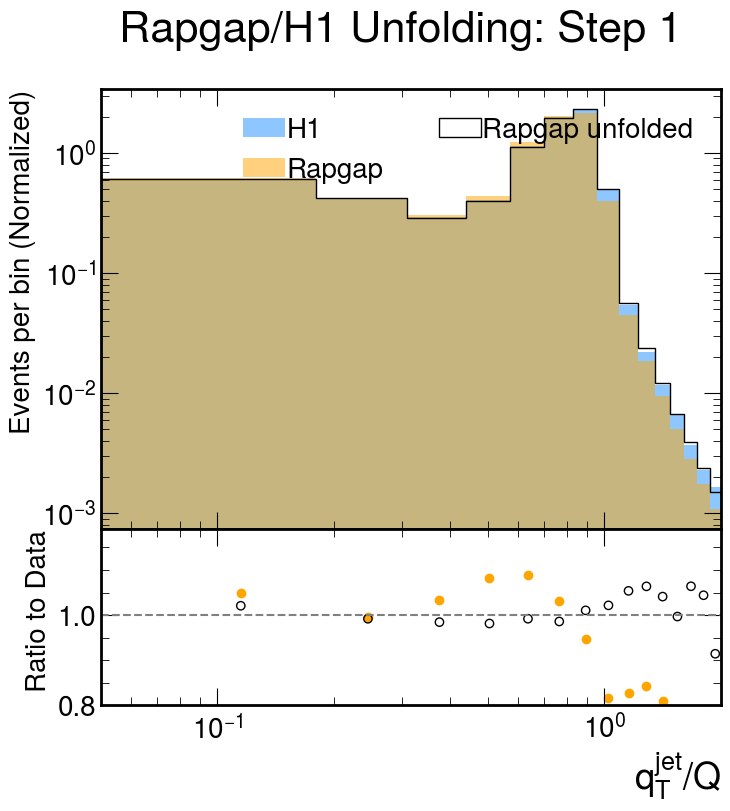

In [16]:
fig = plt.figure(figsize=(8,8))
gs = fig.add_gridspec(2, hspace=0, height_ratios=[2.5, 1])
axs = gs.subplots(sharex=True)

xlow, xhigh = .05, 2
data_qTjet = np.sqrt((filtered_data["jet_px"] + filtered_data["elec_pT"]*np.cos(filtered_data["elec_phi"]))**2 + (filtered_data["jet_py"] + filtered_data["elec_pT"]*np.sin(filtered_data["elec_phi"]))**2)
data_qTQjet = data_qTjet/np.sqrt(filtered_data["Q2"])

MC_qTjet = np.sqrt((filtered_MC["jet_px"] + filtered_MC["elec_pT"]*np.cos(filtered_MC["elec_phi"]))**2 + (filtered_MC["jet_py"] + filtered_MC["elec_pT"]*np.sin(filtered_MC["elec_phi"]))**2)
MC_qTQjet = MC_qTjet/np.sqrt(filtered_MC["Q2"])



data_entries, data_bins, _ = axs[0].hist(data_qTQjet, weights=filtered_data["weight"], bins=15, histtype='stepfilled', label=data_name, density=True, alpha=.5, color='dodgerblue', range=(xlow, xhigh))
MC_entries, MC_bins, _ = axs[0].hist(MC_qTQjet, weights=filtered_MC["weight"], bins=15, histtype='stepfilled', label="Rapgap", density=True, alpha=.5, color='orange', range=(xlow, xhigh))
unfolded_entries, unfolded_bins, _ = axs[0].hist(MC_qTQjet, weights=filtered_MC["weight"]*filtered_MC["unfolded_weights"], bins=15, histtype='step', label="Rapgap unfolded", density=True, color='black', range=(xlow, xhigh))

data_bin_centers = data_bins[:-1]+ 0.5*(data_bins[1:] - data_bins[:-1])

axs[0].set_ylabel("Events per bin (Normalized)", fontsize=20)
axs[0].set_xlim(xlow, xhigh)
axs[0].legend(loc='upper right', handletextpad=0.05, fontsize=20, ncol=2)
axs[0].tick_params(axis='both', which='major', labelsize=20)
axs[0].tick_params(axis='both', which='minor', labelsize=20)
axs[0].set_yscale('log')
# axs[0].set_ylim(0,1)
axs[1].scatter(data_bin_centers, MC_entries/data_entries, color='orange')
axs[1].scatter(data_bin_centers, unfolded_entries/data_entries, color='black', facecolors='none')

if include_vinny:
    vinny_qTjet = np.sqrt((filtered_vinny["jet_px"] + filtered_vinny["elec_pT"]*np.cos(filtered_vinny["elec_phi"]))**2 + (filtered_vinny["jet_py"] + filtered_vinny["elec_pT"]*np.sin(filtered_vinny["elec_phi"]))**2)
    vinny_qTQjet = vinny_qTjet/np.sqrt(filtered_vinny["Q2"])
    unfolded_entries_vinny, unfolded_bins_vinny, _ = axs[0].hist(vinny_qTQjet, weights=filtered_vinny["weight"]*filtered_vinny["unfolded_weights"], bins=15, histtype='step', label="Rapgap unfolded (Vinny)", density=True, color='purple', range=(xlow, xhigh))
    axs[1].scatter(data_bin_centers, unfolded_entries_vinny/data_entries, color='purple', facecolors='none', marker='s')
axs[0].legend(loc='upper right', handletextpad=0.05, fontsize=20, ncol=2)

axs[1].set_ylabel("Ratio to Data", fontsize=20)
axs[1].set_ylim(.8, 1.19)
axs[1].tick_params(axis='both', which='major', labelsize=20)
axs[1].tick_params(axis='both', which='minor', labelsize=20)
axs[1].hlines(1, xlow, xhigh, color='grey', linestyle='dashed' )
plt.xlabel("$q_T^{jet}/Q$")
plt.xscale('log')
plt.suptitle(f"Rapgap/{data_name} Unfolding: Step {step}")
plt.savefig(f"../plots/Rapgap_{data_name}_unfolding_step{step}_qtjetQ.pdf")